# Lab Segmentation 1

In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

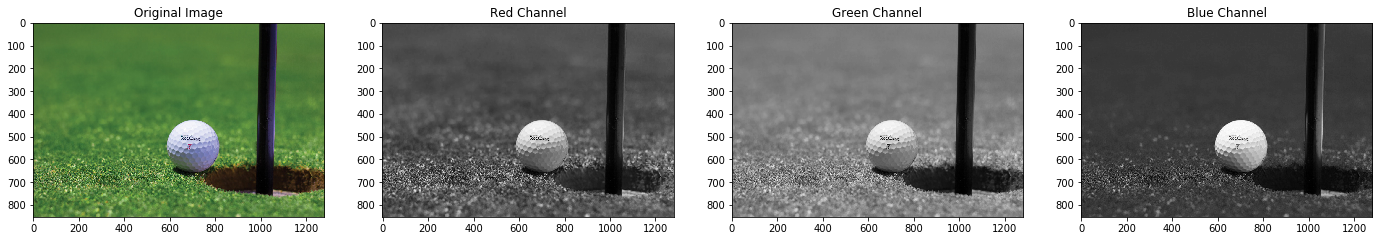

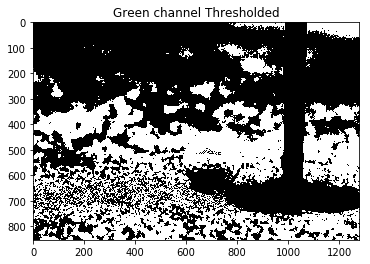

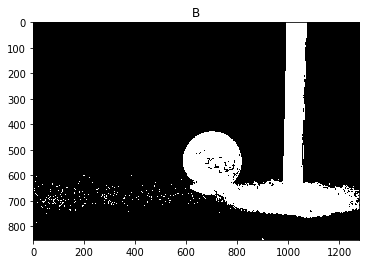

In [48]:
# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
image = io.imread("imgs/exp1/golf.jpeg")
image = (image/255.0).astype(float)


# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
Rchannel = image[:,:,0]
Gchannel = image[:,:,1]
Bchannel = image[:,:,2]

# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
#Green is the clear dominant color Visually

show_images([image,Rchannel,Gchannel,Bchannel],["Original Image","Red Channel","Green Channel","Blue Channel"])

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
temp = Gchannel > 0.5
show_images([temp],["Green channel Thresholded"])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
BGdiff = np.absolute(Gchannel - Bchannel)
RGdiff = np.absolute(Gchannel - Rchannel)

LargerDiff = (BGdiff+RGdiff)/2
Newimage = image.copy()
Newimage[LargerDiff > 0.127] = 0
Newimage[LargerDiff <= 0.127] = 1

# 6- display the binarized image
show_images([Newimage],"Binarized Image")





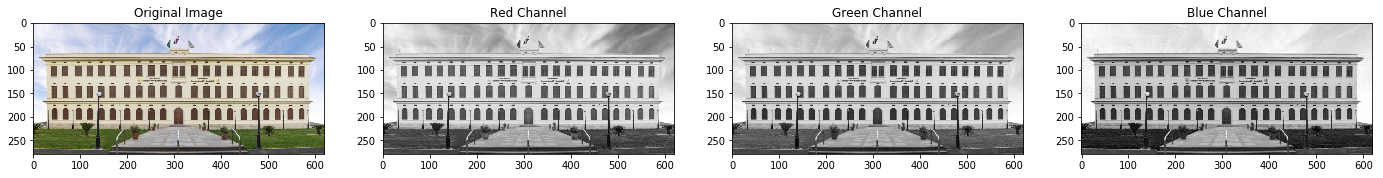

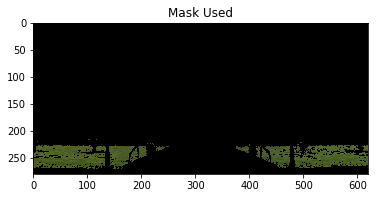

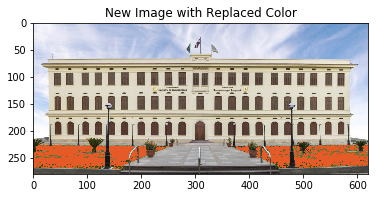

In [23]:
# 1- Get the required RGB color (Using a color picker)
PickedColor = (69/255,100/255,34/255)

# 2- Read image
image = io.imread("imgs/exp2/cufe.png")
image = (image/255.0).astype(float)
# 3- extract R, G and B channels (as float)
Rchannel = image[:,:,0]
Gchannel = image[:,:,1]
Bchannel = image[:,:,2]
show_images([image,Rchannel,Gchannel,Bchannel],["Original Image","Red Channel","Green Channel","Blue Channel"])
# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
Rdiff = Rchannel - PickedColor[0]
Gdiff = Gchannel - PickedColor[1]
Bdiff = Bchannel - PickedColor[2]

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
Distance = np.sqrt( np.square(Rdiff)+np.square(Gdiff)+np.square(Bdiff) )

# 6-  create a mask by thresholding the differences
Threshold = 0.118
Mask = image.copy()
Mask[ Distance > Threshold ] = 0 
show_images([Mask],["Mask Used"])

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
NewImage = image.copy()
NewImage[Distance < Threshold] = (230/255,90/255,40/255)

# 8- show the image or save it
show_images([NewImage],["New Image with Replaced Color"])